In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

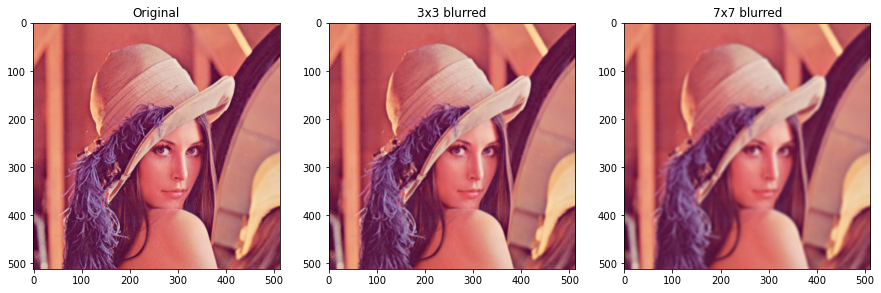

In [38]:
img = cv2.imread("lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur_mask1 = np.ones((3,3), np.float32)
blur_mask1 = blur_mask1/9  # simply divide by some number (using operator overloading)

blur_mask2 = np.ones((7,7), np.float32)
blur_mask2 = blur_mask2/49

# img. blurring with blur mask
blur_img1 = cv2.filter2D(img, -1, blur_mask1)
blur_img2 = cv2.filter2D(img, -1, blur_mask2)

plt.figure(figsize=(15,15))  # to use subplot (looks more clear)

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1,3,2)
plt.title("3x3 blurred")
plt.imshow(blur_img1)

plt.subplot(1,3,3)
plt.title("7x7 blurred")
plt.imshow(blur_img2)

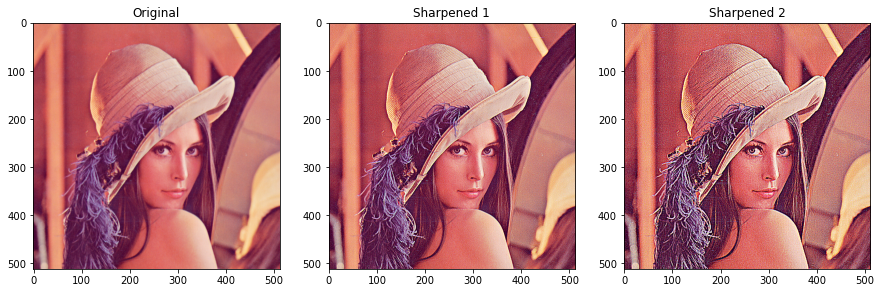

In [40]:
img = cv2.imread("lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

sharp_mask1 = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])  # set the values right away

sharp_mask2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

# img. sharpeninig with sharp mask
sharp_img1 = cv2.filter2D(img, -1, sharp_mask1)
sharp_img2 = cv2.filter2D(img, -1, sharp_mask2)

plt.figure(figsize=(15,15))  # to use subplot (looks more clear)

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1,3,2)
plt.title("Sharpened 1")
plt.imshow(sharp_img1)

plt.subplot(1,3,3)
plt.title("Sharpened 2")
plt.imshow(sharp_img2)

In [16]:
def median_filtering(img, window_size=3):
    assert len(img.shape) == 2, "Suppert grayscal image only"
    
    h, w = img.shape
    result_img = np.zeros((h,w), np.uint8)
    
    ws2 = window_size//2
    
    center_index = (window_size * window_size)//2  # to get the median
    
    for img_y in range(ws2, h - ws2):
        for img_x in range(ws2, w-ws2):
            pixel_list = []
            
            for win_y in range(-ws2, ws2+1):
                for win_x in range(-ws2, ws2+1):
                    y = img_y +win_y
                    x = img_x +win_x
                    
                    pixel_list.append(img[y,x])
                    
            pixel_list.sort()  # sort first
            result_img[img_y][img_x] = pixel_list[center_index]  # copy the median value
                    
    return result_img

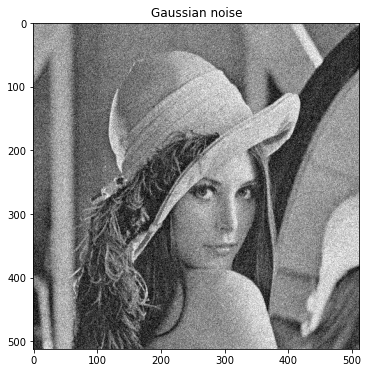

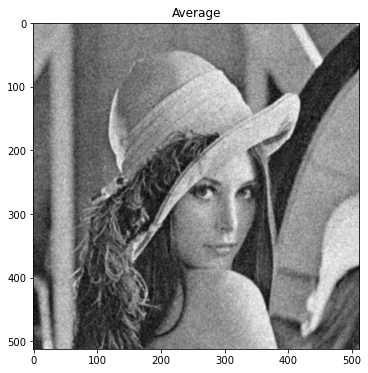

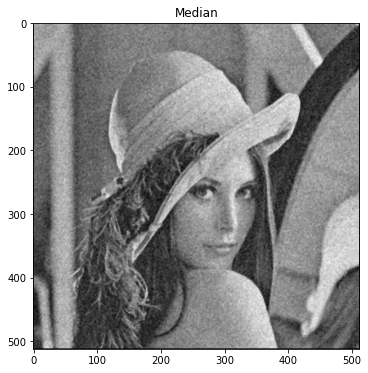

In [44]:
img = cv2.imread("gaussian.png", 0)

avg_mask = np.ones((3,3), np.float32)  # use numpy to make it easier
avg_mask = avg_mask/9  # simply, just divide by 9 (same effect of average)

avg_img = cv2.filter2D(img, -1, avg_mask)

med_img = median_filtering(img, window_size=3)

plt.figure(figsize=(6,6))
plt.title("Gaussian noise")
plt.imshow(img, cmap='gray')

plt.figure(figsize=(6,6))
plt.title("Average")
plt.imshow(avg_img, cmap='gray')

plt.figure(figsize=(6,6))
plt.title("Median")
plt.imshow(med_img, cmap='gray')

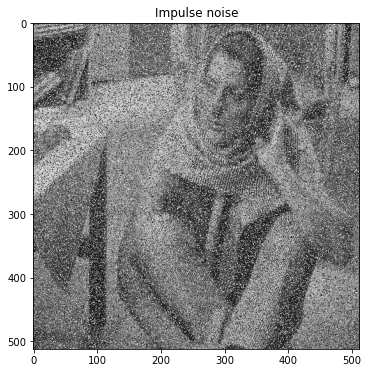

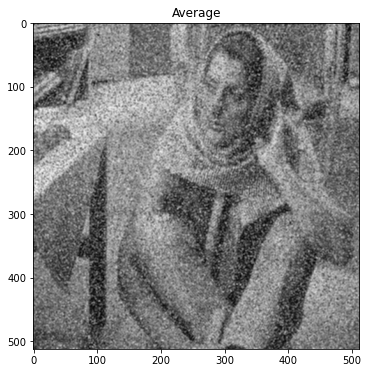

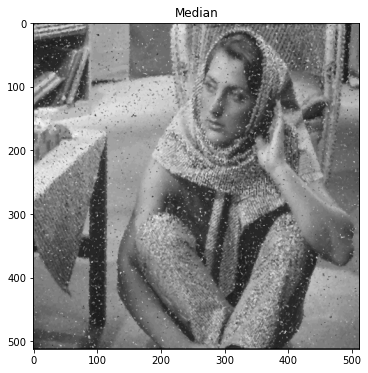

In [18]:
img = cv2.imread("impulse.png", 0)

avg_mask = np.ones((3,3), np.float32)  # use numpy and divide it by 9 (avg.)
avg_mask = avg_mask/9

avg_img = cv2.filter2D(img, -1, avg_mask)

med_img = median_filtering(img, window_size=3)

plt.figure(figsize=(6,6))
plt.title("Impulse noise")
plt.imshow(img, cmap='gray')

plt.figure(figsize=(6,6))
plt.title("Average")
plt.imshow(avg_img, cmap='gray')

plt.figure(figsize=(6,6))
plt.title("Median")
plt.imshow(med_img, cmap='gray')

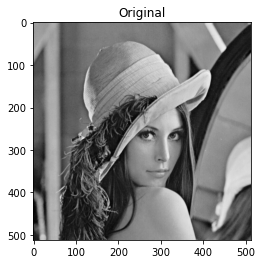

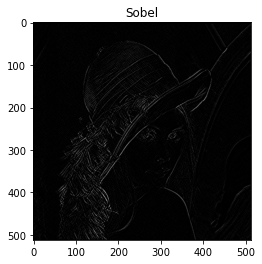

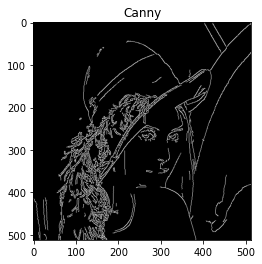

In [19]:
img = cv2.imread("lena.png", 0)

edge_sobel =cv2.Sobel(img, -1, 1, 1)

edge_canny = cv2.Canny(img, 100, 200)

plt.figure()
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.figure()
plt.title("Sobel")
plt.imshow(edge_sobel, cmap='gray')

plt.figure()
plt.title("Canny")
plt.imshow(edge_canny, cmap='gray')
